<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="120" /></center>

# Table of Contents

1. [Introduction](#Section1)<br>
2. [Problem Statement](#Section2)<br>
3. [Installing & Importing Libraries](#Section3)<br>
4. [Data Acquisition & Description](#Section4)<br>
5. [Data Pre-processing](#Section5)<br>
6. [Exploratory Data Analysis](#Section6)<br>
7. [Post Data Processing & Feature Selection](#Section7)<br>
8. [Model Development & Evaluation](#Section8)<br>
  8.1 [Baseline Models](#Section81)<br>
  8.2 [Oversampling Models](#Section82)<br>
9. [Conclusion](#Section9)<br>


<a id = Section1></a>
# 1. Introduction

According to the <a href = "https://www.newyorkfed.org/medialibrary/interactives/householdcredit/data/pdf/HHDC_2019Q3.pdf">CMD's latest Quarterly Report</a> on Household Debt and Credit reveals that total household debt has **increased by $\$$92 billion** to **$\$$13.95 trillion** in the **third quarter** of **2019**. It was the **twenty-first consecutive quarterly** **increase**, and the total is now  **$\$$1.3 trillion higher**, in nominal terms, than the previous peak of  $\$$12.68 trillion in the third quarter of 2008. Non-housing balances increased by **$\$$64 billion** in the third quarter, with increases across the board, including **$\$$18 billion** in auto loans, **$\$$13 billion** in credit card balances, and **$\$$20 billion** in student loans.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Finance/loan%203.png"></center>




# 2. Problem Statement

**The process of issuing loans has increased in complexity over the years due to the different possibilities, market demands and clients’ circumstances.** Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by treacherous lenders. This has made banks a highly regulated entity which is expected to act responsively while providing loans.

<center><img src="https://raw.githubusercontent.com/insaid2018/Domain_Case_Studies/master/Finance/loan2.png"></center>

**<h3>Scenario:</h3>** 

**IndNatBank** is a peer to peer loan financial company who provides loan to its potential customers all over the India. They make profit based on the **risk** they issues loans to the borrowers. Based on the previous data they want to analyze the risk of issuing loans to the new customers which at the same time also helps to **improve the personalization user experience while applying for loans.**

They have experienced employees who uses the complex rules to provide services to their customers. **But as the size of data will increase their traditional ways of assessing risk might not be good for the company**. They wants to **automate their process by which machine learns the pattern out of their data for better customer experience.**

Now the question is how this problem could be solved using Machine Learning? While there are many ways to assess the credit loan risk and its depiction. We will be working with a simple scenario to solve this problem.

The **target feature** in the acquired data set is **is_default** and it's values are:

|Target Feature|Potential Values|
| :-- | :-- |
|**is_default**|0: Not default|
||1: Default|

<a id = Section3></a>
# 3. Installing & Importing Libraries

In [1]:
!pip install -q datascience
!pip install -q pandas-profiling
!pip install -q yellowbrick

In [1]:
# For Panel Data Analysis
import pandas as pd
from pandas_profiling import ProfileReport
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None
# For Numerical Python
import numpy as np
# For Random seed values
from random import randint
# For Data Visualization
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
# For Scientific Computation
from scipy import stats
# For Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
# For Feature Selection
from sklearn.feature_selection import SelectFromModel
%matplotlib inline
# For Data Modeling and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from yellowbrick.classifier import PrecisionRecallCurve
from xgboost import to_graphviz, plot_importance
# To handle class imbalance problem
from imblearn.over_sampling import SMOTE
# To Disable Warnings
import warnings
warnings.filterwarnings(action = "ignore")
pd.options.display.float_format = "{:,.0f}".format

Using TensorFlow backend.


<a id=Section4></a>
# 4. Data Acquisition & Description

We have extracted the data, **year(2007-2015),** of **customer being defaulter** and it can be retrieved from the <a href="https://storage.googleapis.com/industryanalytics/LoanDefaultData.csv">link</a>.

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 8,87,379 | 22 | 131 MB|

| Id | Features | Description |
| :--| :--| :--|
|01|**cust_id**|Unique ID of customer|
|02|**year**|Loan Applied Year|
|03|**state**|State where loan was approved|
|04|**date_issued**|Date when loan was issued|
|05|**date_final**|Final date of loan payment|
|06|**emp_duration**|Employment duration(in years). Range=[0, 10] , where 0 indicates < 1 year and 10 indicates >=10 years|
|07|**own_type**|A status provided by the borrower during registration.  Possible values are MORTGAGE, OTHER, NONE, ANY, RENT, OWN|
|08|**income_type**|Income categorization of customer. Possible values are Low, Medium, High|
|09|**app_type**|Signifies whether the loan is an individual application or a joint application|
|10|**loan_purpose**|Signifies the requirement of loan|
|11|**interest_payments**|Signifies the type of interest payments, categorized under Low and High|
|12|**grade**|Assigned loan grade by the company|
|13|**annual_pay**|Annual salary of the customer|
|14|**loan_amount**|Loan amount required by the customer|
|15|**interest_rate**|Interest rate on the lent money|
|16|**loan_duration**|Loan repayment duration in months(36 or 60)|
|17|**dti**|Debt-to-Income(DTI) is the percentage of a consumer's monthly gross income that goes toward paying debts.|
|18|**total_pymnt**|Total amount that has been paid so far|
|19|**total_rec_prncp**| Total recoverd principal amount so far|
|20|**recoveries**|Amount that has yet to recover|
|21|**installment**|Monthly payment owed by the borrower|
|22|**is_default**|Customer been default or not|


In [2]:
data = pd.read_csv('https://storage.googleapis.com/industryanalytics/LoanDefaultData.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (887379, 22)


,cust_id,year,state,date_issued,date_final,emp_duration,own_type,income_type,app_type,loan_purpose,interest_payments,grade,annual_pay,loan_amount,interest_rate,loan_duration,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
0,180675,2007,Andhra Pradesh,01/12/2007,1032009,10,MORTGAGE,Low,INDIVIDUAL,debt_consolidation,Low,C,73000,25000,11,36 months,22,"13,650","8,767","2,208",817,1
1,85781,2007,Rajasthan,01/06/2007,1072010,0,RENT,Low,INDIVIDUAL,other,Low,C,40000,1400,11,36 months,9,"1,663","1,400",0,46,0
2,85675,2007,Manipur,01/06/2007,1062010,10,RENT,Low,INDIVIDUAL,other,High,E,25000,1000,14,36 months,16,"1,231","1,000",0,34,0
3,84918,2007,Andhra Pradesh,01/09/2007,1042008,10,MORTGAGE,Low,INDIVIDUAL,other,Low,A,65000,5000,7,36 months,0,"5,200","5,000",0,155,0
4,84670,2007,Arunachal Pradesh,01/06/2007,1082009,10,MORTGAGE,High,INDIVIDUAL,other,Low,A,300000,5000,8,36 months,5,"5,566","5,000",0,156,0


In [3]:
data.is_default.value_counts()

0    819950
1     67429
Name: is_default, dtype: int64

### **Data Description**

In this section we will **get information about the data** and see some observations.

In [13]:
data.describe()

,cust_id,year,date_final,emp_duration,annual_pay,loan_amount,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,is_default
count,"887,379","887,379","887,379","887,379","887,379","887,379","887,379","887,379","887,379","887,379","887,379","887,379","887,379"
mean,"32,465,133","2,014","1,047,089",6,"75,028","14,755",13,18,"7,559","5,758",46,437,0
std,"22,827,342",1,"45,551",4,"64,698","8,435",4,17,"7,871","6,625",410,244,0
min,"54,734","2,007","1,012,008",0,0,500,5,0,0,0,0,16,0
25%,"9,206,643","2,013","1,012,016",3,"45,000","8,000",10,12,"1,915","1,201",0,261,0
50%,"34,433,267","2,014","1,012,016",6,"65,000","13,000",13,18,"4,895","3,215",0,383,0
75%,"54,908,135","2,015","1,092,015",10,"90,000","20,000",16,24,"10,617","8,000",0,573,0
max,"68,617,057","2,015","1,122,015",10,"9,500,000","35,000",29,"9,999","57,778","35,000","33,520","1,445",1


**Observation:**

- **50% of employees have 6 years** of **employment duration** which is **almost same for average employees** as indicated by the mean and 50% values.
- The **average annual pay of the employee is $\$$75027.59** and **$\$$18.15 amount of consumer's monthly gross income goes towards paying debts**.
- The **average loan amount required by the applicant is $\$$14755.26**.
- The **average interst rate on average loan amount is 13.24%**.
- On **average $\$$7558.82 amount of money has been paid** so far while **$\$$409.69 amount has yet to be retrieved**.
- **75% of applicants have paid their debt** as indicated by recoveries = 0.

### **Data Information:**

In this section we will see the **information about features i.e. types, count and null?**.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 22 columns):
cust_id              887379 non-null int64
year                 887379 non-null int64
state                887379 non-null object
date_issued          887379 non-null object
date_final           887379 non-null int64
emp_duration         887379 non-null float64
own_type             887379 non-null object
income_type          887379 non-null object
app_type             887379 non-null object
loan_purpose         887379 non-null object
interest_payments    887379 non-null object
grade                887379 non-null object
annual_pay           887379 non-null int64
loan_amount          887379 non-null int64
interest_rate        887379 non-null float64
loan_duration        887379 non-null object
dti                  887379 non-null float64
total_pymnt          887379 non-null float64
total_rec_prncp      887379 non-null float64
recoveries           887379 non-null float64
installm

**Observation:**

- It turns out that **all features contains 887379 values**.
- **date_issued** and **date_final** are categorized as incorrect types.

### **Numerical Data Distribution:**

We shall plot all **numerical features to analyze the distribution** of their past.

Text(0.5, 1.0, 'annual_pay')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'date_final')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'dti')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'emp_duration')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'installment')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'interest_rate')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'is_default')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'loan_amount')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'recoveries')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'total_pymnt')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'total_rec_prncp')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

Text(0.5, 1.0, 'year')

[]

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

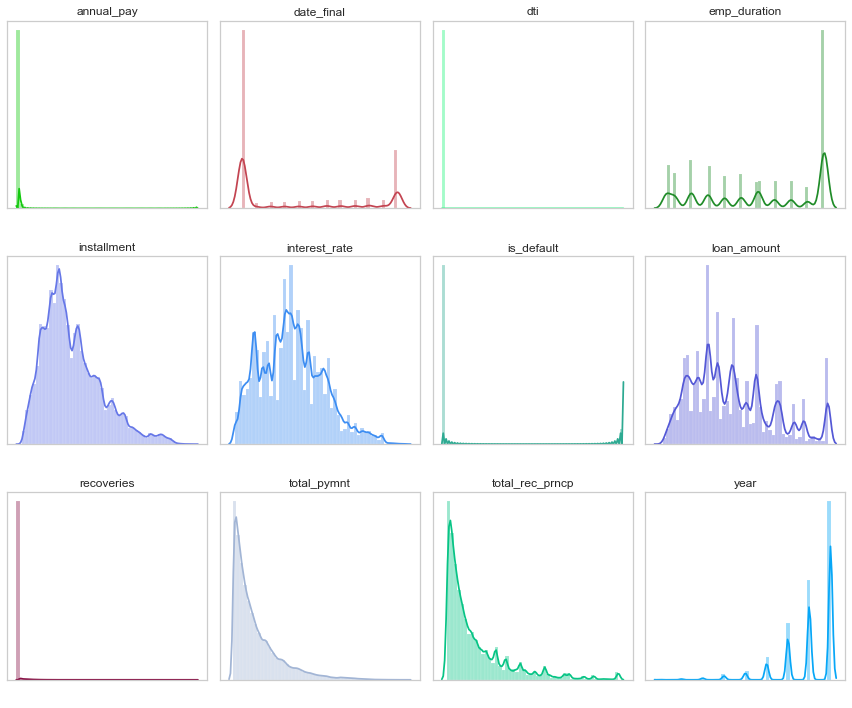

In [6]:
fig, axes = plt.subplots(nrows = 3, ncols = 4, sharex = False, figsize=(12, 10))
colors = []
for i in range(12):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
columns = ['annual_pay', 'date_final', 'dti', 'emp_duration', 'installment', 'interest_rate', 'is_default',
           'loan_amount', 'recoveries', 'total_pymnt', 'total_rec_prncp', 'year']
for ax, col, color in zip(axes.flat, columns, colors):
  sns.distplot(a = data[col], bins = 50, ax = ax, color = color)
  ax.set_title(col)
  plt.setp(axes, yticks=[])
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(False)
plt.tight_layout()
plt.show()

**Observation:**

- Postive Skewed Features:
 - **annual_pay, dti, installment, loan_amount, recoveries, totoal_pymnt**, **total_rec_prncp**.
- Negative Skewed Features:
 - **year**
- ~ Normally Distributed Features:
 - **emp_duration, interest_rate**.

### **Categorical Data Distribution:**

We shall plot all **categorical features to analyze the distribution** of the past data.
- **Firstly we will extract all the categorical features**.
- We **remove date_issued** because we won't be using time series to predict the classes and eventually will get removed at later stage.

In [7]:
# Extracting all the categorical features
cat_list = []
for i in data.columns.values:
  if (data[i].dtype == 'object'):
    cat_list.append(i)
# Excluding date_issued feature    
cat_list.remove('date_issued')
print("Categorical Features", cat_list)

Categorical Features ['state', 'own_type', 'income_type', 'app_type', 'loan_purpose', 'interest_payments', 'grade', 'loan_duration']


<BarContainer object of 28 artists>

Text(0.5, 1.0, 'state')

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

<BarContainer object of 6 artists>

Text(0.5, 1.0, 'own_type')

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'income_type')

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'app_type')

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

<BarContainer object of 14 artists>

Text(0.5, 1.0, 'loan_purpose')

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'interest_payments')

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

<BarContainer object of 7 artists>

Text(0.5, 1.0, 'grade')

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

<BarContainer object of 2 artists>

Text(0.5, 1.0, 'loan_duration')

Text(0.5, 0, ' ')

[Text(0, 0, ' ')]

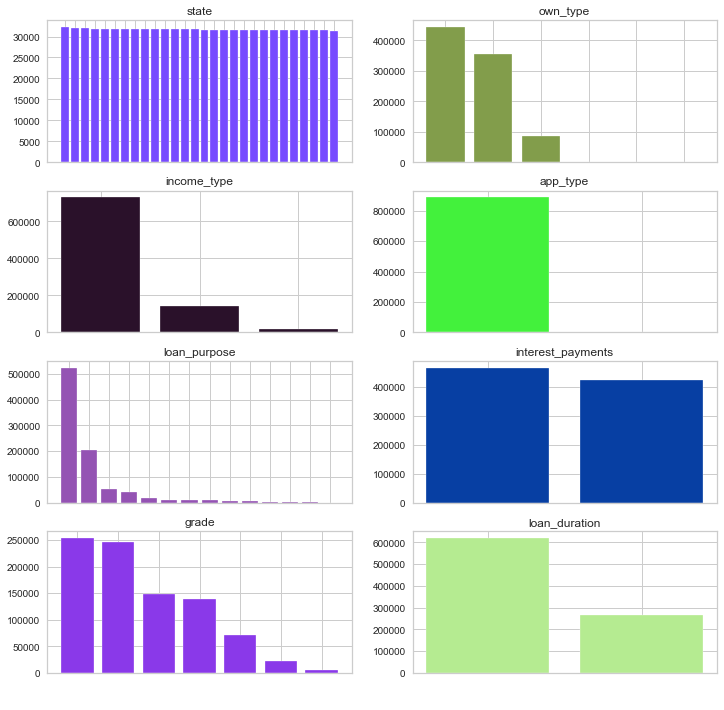

In [8]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, sharex = False, figsize=(12, 12))
colors = []
for i in range(8):
  colors.append('#%06X' % randint(0, 0xFFFFFF))
for ax, col, color in zip(axes.flat, cat_list, colors):
  ax.bar(x = data[col].value_counts().index, height = data[col].value_counts(), color = color)
  ax.set_title(col)
  ax.set_xlabel(' ')
  ax.set_xticklabels(labels = ' ')
  ax.grid(True)

**Observation:**

- Normal Distributed
 - **state, interest_payments, app_type**
- Postively Skewed Features
 - **own_type, income_type, loan_purpose, grade, loan_duration**
- Negatively Skewed Features
 - NA

### **Pre-Profiling Report**

In [10]:
# profile = ProfileReport(data)
# profile.to_file(outputfile = 'Pre Profiling Report.html')
# print('Accomplished!')

**Observation:**

- Profiling identified **10 numeric, 9 categorical, 1 boolean and 2 rejected features**.
- **date_issued** is found to be **cardinal with 103 distinct values**.
- **annual_pay, dti** is found to be **highy skewed**.
- **total_pymnt** is found to **have 2% of zeros** present **while recoveries having 97.2% of zeros**.
- **total_rec_prncp** is **highly correlated** with **total_pymnt** while **installment** is **highly correlated** with **loan_amount**.
- **cust_id** is **highly correlated** with year feature.

<a id = Section5></a>
# 5. Data Pre-Processing

### **Identification & Handling of Inconsistent Data Types**

From the data description it can be seen that **date_issued** and **date_final** and year are **having inconsistent data types and values.**
- Below we shall **create a frame of each type** of feature and **show you** how our **data** looks **before and after making changes**.
- After that we **shall re-run the dataframe** to identify the correct types of features.

**Before changes data types and respective incorrect data**

In [ ]:
# Dataframe before performing changes
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

In [ ]:
# Data before performing changes
data[['date_issued', 'date_final', 'year']].head()

**Performing Correction**

In [ ]:
# Correcting types of features
data['date_issued'] = pd.to_datetime(data['date_issued'])
data['date_final'] = pd.to_datetime(data['date_final'], format = '%d%m%Y')
data['year'] = data['year'].astype('object')

**After changes data types and respective incorrect data**

In [ ]:
# Dataframe after performing changes
type_frame = pd.DataFrame(data = data.dtypes, columns = ['Type'])
type_frame.transpose()

In [ ]:
# Data after performing changes
data[['date_issued', 'date_final', 'year']].head()

### **Identification & Handling of Missing Data**

In [ ]:
print('Data Shape:', data.shape)
null_frame = pd.DataFrame(data = data.isnull().sum(), columns = ['Frequency'])
null_frame.transpose()

**Observation:**

- It turns out that **there aren't any null values present** in our data.

**Now we will see if there are any zeros presents in our data or not.**

In [ ]:
print('Data Shape:', data.shape)
zero_frame = pd.DataFrame(data[data == 0].count(), columns = ['Frequency'])
zero_frame.transpose()

**Observation:**

- **annual_pay of two customers are found to be absent** (We can drop it).
- **dti** feature **contains 451 of zeros** (**Can replace with median**).
- **total_pymnt** feature **contains 17759** records with **zeros** (**Can't drop or replace**).
- **total_rec_prncp contains 18145** records with **zeros** (**Can't drop or replace**).
- **recoveries contains 862702** of records with **zeros** not identifying missing data (**Can't drop or replace**).
- **is_default** is a categorical features contatining only 0 and 1 (**Can't drop or replace**).

**Dropping Records**

In [ ]:
# Dropping two records containing annual_pay = 0
data = data[data['annual_pay'] != 0]

**Replacing data with Median**

In [ ]:
# Replacing dti feature containing NaN values with median values
data['dti'] = data['dti'].replace(0, np.median(data['dti']))
print('Accomplished!')

In [ ]:
# Verifying Zeros Frequency
print('Shape:', data.shape)
zero_frame = pd.DataFrame(data[data == 0].count(), columns = ['Frequency'])
zero_frame.transpose()

**Observation:**

- **total_pymnt** feature **contains 17759** records with **zeros** (**Can't drop or replace**).
- **total_rec_prncp contains 18145** records with **zeros** (**Can't drop or replace**).
- **recoveries contains 862702** of records with **zeros** not identifying missing data (**Can't drop or replace**).
- **is_default** is a categorical features contatining only 0 and 1 (**Can't drop or replace**).

### **Identification & Handling of Duplicate Rows**

- Now we will **identify the duplicacity in records and if present**, **we will drop it**. 
- We are **making a copy of data** on which we will work on **so that our original data is intact from harm** and **after identifying** we **can perfrom the same operation on our original data**. 
- We'll **drop cust_id** to identify whether there are **duplicate rows** present in our data or not.

In [ ]:
data2 = data.copy()

In [ ]:
# Dropping cust_id as it is unique
data2 = data2.drop('cust_id', axis = 1)
print('Drop Success!')

In [ ]:
data2.duplicated().any()

**Observation:**

- It turns out that **there aren't any duplicate rows** present in our data.

### **Identification & Handling of Duplicate Columns**

Below we have **made a custom function to identify duplicate columns containing duplicate values**.

In [ ]:
def duplicateCols(dataframe):
  '''Returns a list of labels of duplicate valued columns'''
  names = set()
  for i in range(dataframe.shape[1]):
    col1 = dataframe.iloc[:, i]
    for j in range(i+1, dataframe.shape[1]):
      col2 = dataframe.iloc[:, j]
      if col1.equals(col2):
        names.add(dataframe.columns.values[j])

  if (len(names) == 0):
    return None
  else:
    return list(names)

In [ ]:
# Making a call
is_duplicate_cols = duplicateCols(data2)
print('Contains Duplicate Columns?', is_duplicate_cols)

**Observation:**

- From the above, it can be seen that **there are no duplicate columns present** in our data.

### **Post Profiling Report**

In [ ]:
# profile = ProfileReport(data)
# profile.to_file(outputfile = 'Post Profiling Report.html')
# print('Accomplished!')

**Observation:**

 - There are: **Numeric = 9**, **Categorical = 8**, **Boolean = 1**, **Date = 2** features.
 - **annual_pay**, **dti** are **highly skewed**.
 - **total_pymnt have 2% of zeros signifying 2% of people haven't paid any money**.
 - **total_rec_prncp is highly correlated with total_pymnt**,
 installment is highly correlated with loan_amount & should be ignored for analysis.
 - **recoveries has 97.2% zeros signifying around 97% of people have paid their debt.**


<a id = Section6></a>
# 6. Exploratory Data Analysis

In [ ]:
print('Data Shape:', data.shape)
data.head()

**<h4>Question 1:** What is the **proportion** of **customers who are defaulter** and **who are not**?</h4>

In [ ]:
print('Customers who are not default:', data['is_default'].value_counts()[0])
print('Customers who are default:', data['is_default'].value_counts()[1])

space = np.ones(2)/10
data['is_default'].value_counts().plot(kind = 'pie', explode = space, fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [13.66, 7.68], legend = True)
plt.legend(['Not Default', 'Default'])
plt.ylabel('Category')
plt.title('Proportion of default customers', size = 14)
plt.show()

**Observation:**

- It comes out that only **7.6% of customers** who took the loan have been identified defaulted out of 887377 customers.

**<h4>Question 2:** What is the **rate of loan default** with respect to **final_date?</h4>**

In [ ]:
year_frame = pd.DataFrame(data.groupby(by = ['date_final', 'is_default']).size(), columns = ['Count'])
year_frame.transpose()

In [ ]:
figure = plt.figure(figsize = [10, 6])
data[data['is_default'] == 1]['date_final'].value_counts().plot(kind = 'line')
plt.xlabel('Year', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Loan Default rate at each year', size = 16)
plt.show()

**Observation:**

- We can see that default rate **around 2015-02 year was more steep than any other year.**

**<h4>Question 3**: What is the **frequency** of **ownership** with respect to the being **default** of loan?</h4>

In [ ]:
own_type_frame = pd.DataFrame(data.groupby(by = ['own_type', 'is_default']).size(), columns = ['Count'])
own_type_frame.transpose()

In [ ]:
figure = plt.figure(figsize = [12, 8])
ax = sns.countplot(x = 'own_type',  data = data, hue = 'is_default', palette = ['darkcyan', 'crimson'])
total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 10
  y = p.get_y() + p.get_height() + 2
  ax.annotate(percentage, (x, y))
plt.yticks(range(0, 500000, 20000))
plt.xlabel('Ownership Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Frequency occurence of Ownership Type', y=1.05, size = 16)
plt.show()

**Observation:**

- From the above analysis we can see that there are **very few or no data points** that are on **default** for **NONE**, **OTHER**, **ANY**. We could drop these points and visualize our results again.
- **Customers being default are only present for MORTGAGE, RENT and OWN type of Ownership**.

In [ ]:
print('Before Filtering Shape:', data.shape)
data = data[(data['own_type'] == 'MORTGAGE') | (data['own_type'] == 'RENT') | (data['own_type'] == 'OWN')]
print('After Filtering Shape:', data.shape)

**<h4>Question 4:** What is the **frequency** & **proportion** of **ownership** **type** that has been **acquired** with **respect to the loan**?</h4>

In [ ]:
print(data['own_type'].value_counts())
# Bar Plot
colors_list = ['lightcoral', 'lightgreen', 'mediumturquoise']
figure = plt.figure(figsize = [12, 8])
plt.subplot(1, 2, 1)
sns.barplot(data['own_type'].value_counts().index, data['own_type'].value_counts(), palette  = colors_list)
plt.yticks(range(0, 500000, 20000))
plt.xlabel('Ownership Type')
plt.ylabel('Frequency')
plt.title('Frequency occurence of Ownership Type', y=1.05, size = 14)

explode_list = [0, 0 , 0.2]

plt.subplot(1, 2, 2)
# Pie Plot
data['own_type'].value_counts().plot(kind = 'pie', figsize = [10, 5], autopct = '%1.1f%%', startangle = 90, 
                                     shadow = True, labels = None, pctdistance = 1.12, colors = colors_list, 
                                     explode = explode_list)
plt.title('Proportion of each Ownership Type w.r.t loan', y = 1.05, size = 14)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = data['own_type'].value_counts().index, loc = 'upper left', frameon = False)
plt.tight_layout(pad=2.0)
plt.show()

**Observation:**

- From above we can see that **50% of customers have ownership under MORTGAGE type**.

**<h4>Question 5:** What is the **frequency** distribution of **loan defaulter across each state**?</h4>

In [ ]:
year_frame = pd.DataFrame(data.groupby(by = ['state', 'is_default']).size(), columns = ['Count'])
year_frame.transpose()

In [ ]:
figure = plt.figure(figsize = [12, 8])
sns.countplot(x = 'state',  data = data, hue = 'is_default', palette = ['coral', 'darkblue'])
plt.yticks(range(0, 35000, 2000))
plt.xlabel('State', size = 14)
plt.xticks(rotation = 90, size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Defaulter vs Non-Defaulter per State', y = 1, size = 16)
plt.show()

**Observation:**

- From the above visualization, we found that **each state has almost equally default rate frequency distribution (~2500/state)**.

**<h4>Question 6:** What is the **distribution** of **loan default with respect to the loan duration**?</h4>

In [ ]:
loan_duration_frame = pd.DataFrame(data.groupby(by = ['loan_duration', 'is_default']).size(), columns = ['Count'])
loan_duration_frame.transpose()

In [ ]:
figure = plt.figure(figsize = [12, 8])
ax = sns.countplot(x = 'loan_duration',  data = data, hue = 'is_default', palette = ['cadetblue', 'coral'])
total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 3
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))
plt.xlabel('Loan Duration', size = 14)
plt.ylabel('Frequency', size = 14)
plt.yticks(range(0, 600000, 20000))
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Loan Duration vs Loan Default ', y = 1, size = 16)
plt.show()

**Observation:**

- Customers with **36 months loan duration** are found to be **more defaulter** **than** the customers with 60 months of loan duration.

**<h4>Question 7:** What is the **frequency** distribution of **loan purpose with respect to loan default**?</h4>

In [ ]:
loan_duration_frame = pd.DataFrame(data.groupby(by = ['loan_purpose', 'is_default']).size(), columns = ['Count'])
loan_duration_frame.transpose()

In [ ]:
figure = plt.figure(figsize = [12, 8])
sns.countplot(x = 'loan_purpose',  data = data, hue = 'is_default', palette = ['#95a5a6', '#9b59b6'])
plt.xlabel('Loan Purpose', size = 14)
plt.ylabel('Frequency', size = 14)
plt.xticks(rotation = 90)
plt.yticks(ticks = range(0, 500000, 20000))
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Loan Purpose vs Loan Default', y = 1, size = 16)
plt.show()

**Observation:**

- Customers with **debt_consolidation** are found to be **more defaulter than any other reason** of loan purpose.

**<h4>Question 8:** Which **grade** is **mostly influenced by** the **is_default** feature?</h4>

In [ ]:
figure = plt.figure(figsize = [12, 8])
ax = sns.countplot(x = 'grade',  data = data, hue = 'is_default', palette = ['#3498db', '#e74c3c'])
total = data.shape[0]
for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width() / 8
  y = p.get_y() + p.get_height()
  ax.annotate(percentage, (x, y))
plt.xlabel('Grade', size = 14)
plt.ylabel('Frequency', size = 14)
plt.yticks(ticks = range(0, 260000, 20000))
plt.legend(labels = ['Not Default', 'Default'], loc = 'upper right')
plt.title('Frequency occurence of grade w.r.t. Loan Default', y = 1.05, size = 16)
plt.show()

**Observation:**

- We can see that **C grade is highly influenced** followed by D then B and then all other in order.

Now **we will** make a function to **analyze the default rate with respect to some numerical features**. We will **analyze the outliers and perform capping** over these outliers.

In [ ]:
def QuantileDistPlot(x, y, sup_title):
  '''
  A function to plot distribution of quantiles of features
  x: categorical feature
  y: Numerical feature
  sup_title: sup_title
  '''
  figure = plt.figure(figsize = [12, 8])
  plt.subplot(1, 2, 1)
  sns.boxplot(y = data[x])
  plt.xlabel('Overall', size = 14)
  plt.ylabel('Interest Rate', size = 14)
  plt.title('Aggregate View', size = 16)
  plt.suptitle(t = "Quantile Distribution of " + sup_title + " feature", y = 1.03, size = 18)

  plt.subplot(1, 2, 2)
  ax = sns.boxplot(x = data[y], y = data[x])
  ax.set_xticklabels(labels = ['No', 'Yes'])
  plt.xlabel('Default', size = 14)
  plt.ylabel('Interest Rate', size = 14)
  plt.title('Segregate View', size = 16)
  plt.tight_layout(pad = 2.0)
  plt.show()

**<h4>Question 9:** What is the **distribution of annual income with being default or not**?</h4>

In [ ]:
QuantileDistPlot(x = 'annual_pay', y = 'is_default', sup_title = 'Annual Pay')

**Observation:**

- As a result we saw **so many** values which are **outliers**.
- We **will estimate the 99th percentile value** and **perform the capping over these outliers**.

Before making changes we should **analyze the amount** that is **present at 99th percentile**.

In [ ]:
print('Amount [at 99 percentile]:', data['annual_pay'].quantile(0.99))

Next we need to **identify** that part of the **data**, that contains defaulter as well as non-defaulter **greater than 99th percentile**.

In [ ]:
annual_pay_default = data[(data['is_default'] == 1) & (data['annual_pay'] > data['annual_pay'].quantile(0.99))]['annual_pay']
annual_pay_notdefault = data[(data['is_default'] == 0) & (data['annual_pay'] > data['annual_pay'].quantile(0.99))]['annual_pay']

print('Customers Frequency [default]:', len(annual_pay_default))
print('Customers Frequency [not default]:', len(annual_pay_notdefault))

We can also look at the **average amount for the defaulter as well as non-defaulter**.

In [ ]:
print('The average annual income of customers [default]:', np.round(annual_pay_default.mean(), decimals = 2))
print('The average annual income of customers [not default]:', np.round(annual_pay_notdefault.mean(), decimals = 2))

**Performing capping over outliers**

- From the above analysis we can saw that **annual_pay** feature contains **outliers**. 
- We can **apply capping here at 99th percentile** and visualize again.

In [ ]:
outlier_index = data[data['annual_pay'] > data['annual_pay'].quantile(0.99)].index
data.loc[outlier_index, 'annual_pay'] = data['annual_pay'].quantile(0.99)
QuantileDistPlot(x = 'annual_pay', y = 'is_default', sup_title = 'Annual Pay')

**Observation:**

- From above we can see that the **values are distributed outside the extremes**. 
- **We will handle this** spread by **applying standardization** on data when we will prepare data **before feeding to the model**.

**<h4>Question 10:** What is the **distribution of interest rate with being default or not**?</h4>

In [ ]:
QuantileDistPlot(x = 'interest_rate', y = 'is_default', sup_title = 'Interest Rate')

**Observation:**

- We can see some **outlier**. We can perform **capping** here. 
- We shall see the values greater than 99th precentile.
- Lets' get the value of interest rate at **99th percentile** and replace the outlied values with 99th percentile value.


Before making changes we should **analyze the interest rate** that is **present at 99th percentile**.

In [ ]:
print('Interest Rate [at 99 percentile]:', data['interest_rate'].quantile(0.99))

Next we need to **identify** that part of the **data**, that contains defaulter as well as non-defaulter **greater than 99th percentile**.

In [ ]:
interest_rate_default = data[(data['is_default'] == 1) & (data['interest_rate'] > data['interest_rate'].quantile(0.99))]['interest_rate']
interest_rate_notdefault = data[(data['is_default'] == 0) & (data['interest_rate'] > data['interest_rate'].quantile(0.99))]['interest_rate']

print('Customers Frequency [default]:', len(interest_rate_default))
print('Customers Frequency [not default]:', len(interest_rate_notdefault))

We can also look at the **average interest rate for the defaulter as well as non-defaulter**.

In [ ]:
print('The average interest rate [default]:', np.round(interest_rate_default.mean(), decimals = 2))
print('The average interest rate [not default]:', np.round(interest_rate_notdefault.mean(), decimals = 2))

**Performing capping over outliers**

- From the above analysis we can saw that **interest_rate** feature contains **outliers**. 
- We can **apply capping here at 99th percentile** and visualize again.

In [ ]:
# Performing capping and analyzing again
outlier_index = data[data['interest_rate'] > data['interest_rate'].quantile(0.99)].index
data.loc[outlier_index, 'interest_rate'] = data['interest_rate'].quantile(0.99)
QuantileDistPlot(x = 'interest_rate', y = 'is_default', sup_title = 'Interest Rate')

**Observation:**

- We can see that there are **still some values that lies at extreme** for non-defaulter. 
- We **will handle this** by **applying standardization while preparing data** **for our model**.

**<h4>Question 11:** What is the **distribution of Dept to Income Ratio (dti) with being default or not**?</h4>

In [ ]:
QuantileDistPlot(x = 'dti', y = 'is_default', sup_title = 'Debt-to-Income')

**Observation:**

- Again we can see some **outliers in the dti feature.** 
- **We will do the same thing, replacing outliers with 99th percentile.**

Before making changes we should **analyze the dti** that is **present at 99th percentile**.

In [ ]:
print('Debt to Income Ratio (dti) [at 99 percentile]:', data['dti'].quantile(0.99))

Next we need to **identify** that part of the **data**, that contains defaulter as well as non-defaulter **greater than 99th percentile**.

In [ ]:
dti_default = data[(data['is_default'] == 1) & (data['dti'] > data['dti'].quantile(0.99))]['dti']
dti_notdefault = data[(data['is_default'] == 0) & (data['dti'] > data['dti'].quantile(0.99))]['dti']

print('Customers Frequency [default]:', len(dti_default))
print('Customers Frequency [not default]:', len(dti_notdefault))

We can also look at the **average dti for the defaulter as well as non-defaulter**.

In [ ]:
print('The average dti value of issued loan [default]', np.round(dti_default.mean(), decimals = 2))
print('The average dti value of issued loan [not default]', np.round(dti_notdefault.mean(), decimals = 2))

**Performing capping over outliers**

- From the above analysis we can saw that **dti** feature contains **outliers**. 
- We can **apply capping here at 99th percentile** and visualize again.

In [ ]:
# Performing capping and analyzing again
outlier_index = data[data['dti'] > data['dti'].quantile(0.99)].index
data.loc[outlier_index, 'dti'] = data['dti'].quantile(0.99)
QuantileDistPlot(x = 'dti', y = 'is_default', sup_title = 'Debt-to-Income')

**Observation:**

- It turns out that **we get rid of all the outliers present for dti feature**.

<a id = Section7></a>
# 7. Post Data Processing & Feature Selection

In [ ]:
print('Data Shape:', data.shape)
data.head()

### **Dropping Unncessary Features:**
We can **drop cust_id, date_issued and date_final** as they are not useful for prediction purpose.

In [ ]:
data.drop(labels = ['cust_id', 'date_issued', 'date_final'], axis = 1, inplace = True)
print(data.shape)
data.head()

### **Handling Categorical Features:**

We can perform **label encoding on year, income_type, app_type, interest_payments, grade, loan_duration** as they are ordered features & **one hot encoding on own_type, loan_purpose** as they are unordered in nature. But state is unordered, if performed label encoding, machine will make a difference and if we performed dummification, there will be too many features. Instead we can drop it.

In [ ]:
data.drop(labels = ['state'], axis = 1, inplace = True)
print(data.shape)
print('Drop Success!')

#### **Performing Label Encoding**

In [ ]:
ordered_labels = ['year', 'income_type', 'app_type', 'interest_payments', 'grade', 'loan_duration']
encode = LabelEncoder()

for i in ordered_labels:
  if isinstance(data[i].dtype, object):
    data[i] = encode.fit_transform(data[i])
print('Label Encoding Success!')
print('Data Shape:', data.shape)
data.head()

#### **Performing Dummification**

In [ ]:
data = pd.get_dummies(data = data, columns = ['own_type', 'loan_purpose'])
print('Data Shape:', data.shape)
data.head()

In [ ]:
X, y = data.drop('is_default', axis = 1), data['is_default']
print('X Shape:', X.shape)
print('y Shape:', y.shape)

#### **Performing Standardization**

In [ ]:
std_scale = StandardScaler()
scale_fit = std_scale.fit_transform(X)

X_data = pd.DataFrame(scale_fit, columns = X.columns)
print('Data Shape:', X_data.shape)
X_data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size = 0.2, random_state = 42, stratify = y)
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

### **Feature Selection using Random Forest**

- **Random forests** are one the most **popular machine learning algorithms**. - They **provide**,
 - **a good predictive performance**,
 -**low overfitting and**
 -**easy interpretability.** 
-This interpretability **derives** the **importance of each feature** on the tree decision. In other words, it is **easy to compute** how much **each feature is contributing** to the **decision**.

In [ ]:
# Have some patience, may take some time.
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 42))
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
print('Total Features Selected are', len(selected_feat))
print('Features:', selected_feat)

**Observation:**

- **There are 9 features estimated important by Random Forest:** 
 - year,
 - annual_pay, 
 - loan_amount, 
 - interest_rate, 
 - dti, 
 - total_pymnt, 
 - total_rec_prncp, 
 - recoveries, 
 - installment.

<a id = Section8></a>
# 8. Model Development & Evaluation

In this section we'll **build model using** only **important features** that impact highly on our target feature i.e. is_default.<br> In the following part we will make a function to plot the performance of the model.

In [ ]:
def PRCurve(model):
  '''
  A function to visualize Precision Recall Curve.
  Returns average precision score of the model.
  Data to fit must be training i.e. X_train, y_train.
  Data score will be estimated on X_test, y_test.
  '''
  viz = PrecisionRecallCurve(model)
  viz.fit(X_train, y_train)
  avg_prec = viz.score(X_test, y_test)
  plt.legend(labels = ['Binary PR Curve',"AP=%.3f"%avg_prec], loc = 'lower right', prop={'size': 14})
  plt.xlabel(xlabel = 'Recall', size = 14)
  plt.ylabel(ylabel = 'Precision', size = 14)
  plt.title(label = 'Precision Recall Curve', size = 16)

<a id = Section81></a>
## 8.1 Baseline Models

In [ ]:
imp_feature = X_data[['emp_duration', 'annual_pay', 'loan_amount', 'interest_rate', 'dti', 'total_pymnt', 'total_rec_prncp', 'recoveries', 'installment']]
X_train, X_test, y_train, y_test = train_test_split(imp_feature, y, test_size = 0.2, random_state = 42, stratify = y)

### **Logisitic Regression**

In [ ]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

**Observation:**

- The **accuracy comes out to be 95%**, but we can analyze something strange here.
- **Recall of minority class is very less i.e 34% and f1 score comes out to be 51%**. 
- The **average precision** comes out to be **54.3%** only. 
- It can be seen that model is more biased towards minority class. Let's see how random forest behaves on this imbalanced data.

### **Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

**Observation:**

- It seems there is **no change in accuracy but in recall of minority class i.e. 36% and f1 score of 53%**. 
- The average precision comes out to be 55.5%.
- **Random Forest failed to handle this undersampled data**. Let's try it on Extreme Gradient Boosting.

### **Extreme Gradient Boosting Classifier**

In [ ]:
clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(X_test, y_test), decimals = 3))

# Classification Report
XGB_report = classification_report(y_test, y_pred)
print(XGB_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = clf)
plt.show()

**Observation:**

- We can see that average precision recall has improved to 60% only.
- As our Precision Recall values are not good because our data set is **highly imbalanced**. 
- We will opt **Synthetic Minority Oversampling Technique (SMOTE)** to bias data to solve the class imbalance problem.

<a id = Section82></a>
## 8.2 Oversampling Models

### **SMOTE Technique & its Implementation**

- Synthetic Minority Oversampling Technique(SMOTE) **aims to balance class distribution by randomly increasing minority class examples by replicating them.** 
- **SMOTE** synthesises new minority instances between existing minority instances. 
- **It generates the virtual training records by linear interpolation for the minority class.** 
- These **synthetic training records are generated by randomly selecting** one or more of the k-nearest neighbors for each **example in the minority class**. 
- **After** the **oversampling process**, the **data is reconstructed** and several classification models can be applied for the processed data.

In [ ]:
# Have some patience, may take some time
sm = SMOTE(random_state = 42, ratio = 1)
X, y = sm.fit_sample(X_data, y)
X_new = pd.DataFrame(data = X, columns = X_data.columns)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
X_new.head()

### **Logistic Regression**

In [ ]:
log  = LogisticRegression(random_state = 42)
log.fit(X_train, y_train)
y_pred = log.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(log.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(log.score(X_test, y_test), decimals = 3))

# Classification Report
logistic_report = classification_report(y_test, y_pred)
print(logistic_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = log)
plt.show()

**Observation:**

- The result as comparsion to baseline is much better. Even the accuracy has been **dropped to 78%** but still **our precision, recall & f1 score comes out to be much better**. 
- Our **average precision recall** comes out to be **much better from before** as well.
- Let's see how random forest will be affected after balacing our minority class.

### **Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 42, n_jobs = -1)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(rfc.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(rfc.score(X_test, y_test), decimals = 3))

# Classification Report
random_forest_report = classification_report(y_test, y_pred)
print(random_forest_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = rfc)
plt.show()

**Observation:**

- It can bee seen that **average precision recall score has improved to 90%**. 
- The **accuracy** has **improved only 1%** more **than Logistic Regression**.
- We will **analyze** how the **XGboosting algorithm** will behave.

### **Extreme Gradient Boosting Classifier**

In [ ]:
clf = XGBClassifier(max_depth = 5, n_jobs = -1, random_state = 42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Accuracy Estimation
print('Accuracy Score (Train Data):', np.round(clf.score(X_train, y_train), decimals = 3))
print('Accuracy Score (Test Data):', np.round(clf.score(X_test, y_test), decimals = 3))

# Classification Report
XGB_report = classification_report(y_test, y_pred)
print(XGB_report)

# Precision Recall Curve
figure = plt.figure(figsize = [10, 8])
PRCurve(model = clf)
plt.show()

**Observation:**

- It can be seen that our **model accuracy has been increased to ~92% after balancing our data & applying boosting algorithm**. 
- The average **precision** comes out to be **97.8%** with respect to the previous models.

### **Model Performances**

In [ ]:
model_names = ['--------------------Logistic Regression---------------------\n',  
               '\n------------------Random Forest Classifier------------------\n', 
               '\n------------Extreme Gradient Boosting Classifier------------\n']
report = model_names[0] + logistic_report + model_names[1] + random_forest_report + model_names[2] + XGB_report
print(report)

### **Feature Importances:**

Now that we know that **XGBoost** outperformed other models, we can check **which features** have been cateogrized as **important** learned by the **model**.

In [ ]:
fig = plt.figure(figsize = [12, 8])
ax = fig.add_subplot(1, 1, 1)
colours = ['#CAF270', '#95E681', '#65D794', '#3CC5A3', '#26B1AC', '#359CAC', '#4D86A4', '#607093', '#695B7C']
ax = plot_importance(clf, height = 1, color = colours, grid = False, show_values = False, importance_type = 'cover', ax = ax)
total = data.shape[0]
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.2
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
plt.title('Ordering feature importance learned by model', size = 14)
plt.show()

<a id = Section9></a>
# 9. Conclusion

- We investigated in depth about the features i.e. **which features are important to retain (year, emp_duration, annual_pay, loan_amount, interest_rate, dti, total_pymnt, total_rec_prncp, recoveries, installment) and which to discard.**
- **Important feature extraction** was especially **done with the help of Random Forest** which **intrinsically performed operations** and **estimated important features** and later down by XGBoost algorithm.
- We **handled largely skewed data along with outliers using certain operations like capping and then normalizing on annual_income, interest_rate and dti features.**
- We **explored various questions** that were related to the customer being default or not.
- To **deal with highly imbalanced data, we choose an appropriate metric i.e. SMOTE** to balance our data.
- We **applied different machine learning algorithms** like Logistic Regression, Random Forest and XGBoost and **found XGBoost outperforming rest of the models**.